# Problem Statement:- This dataset consist of agricultural dataset we have to build have model which would accurately predict the outcome of the harvest ie whether the crop would be healthy,damaged by pesticides or damaged by any other reason

In [1]:
import numpy as np
import pandas as pd
# For Visualization of data we would import
import matplotlib.pyplot as plt
import seaborn as sns
#For preprocessing like scaling,encoding we would import
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#for model selection we import
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#For measuring the performance of the model we will import
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Ensembleling
from sklearn.ensemble import RandomForestClassifier
#For saving the file we would import
import pickle


In [2]:
#Now that we have imported all the necessary files lets start with our EDA process

In [3]:
df=pd.read_csv('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/train_agriculture.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#Our Dataset consist of categorical variable also our target variable which is a categorical variable and it is already in numerical format wher 0 means Alive,1 means damaged due to other causes and 2 means damaged due to Pesticides

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [6]:
#Lets check the statistical summary of the data

In [7]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
df.dtypes #Checking for the various datatypes that exist in the dataset

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [9]:
#Now lets check and analyse the dataset in depth
df['Season'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
df['Crop_Type'].unique()

array([1, 0], dtype=int64)

In [11]:
df['Soil_Type'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Pesticide_Use_Category'].unique()

array([1, 3, 2], dtype=int64)

In [13]:
df['Season'].unique()

array([1, 2, 3], dtype=int64)

In [14]:
df['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

In [15]:
#lets check the unique values in the loops
for i in df.keys():
    print('Column Name: ',i)
    print(df[i].unique())

Column Name:  ID
['F00000001' 'F00000003' 'F00000004' ... 'F00155939' 'F00155942'
 'F00155945']
Column Name:  Estimated_Insects_Count
[ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]
Column Name:  Crop_Type
[1 0]
Column Name:  Soil_Type
[0 1]
Column Name:  Pesticide_Use_Category
[1 3 2]
Column Name:  Number_Doses_Week
[ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
Column Name:  Number_Weeks_Used
[ 0. nan 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35.
 32. 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43.
 50. 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59.
 64. 13.  7.  5. 12.  6.  9. 58. 11. 65. 67.]
Column N

In [16]:
#Lets drop id column as it is of no use for us to train the model
df.drop(['ID'],axis=1,inplace=True)

In [17]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [18]:
df.shape

(88858, 9)

In [19]:
#Now we have 88858 rows and 9 columns

In [20]:
df.isnull()#Lets check for null values

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
88853,False,False,False,False,False,False,False,False,False
88854,False,False,False,False,False,False,False,False,False
88855,False,False,False,False,False,False,False,False,False
88856,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

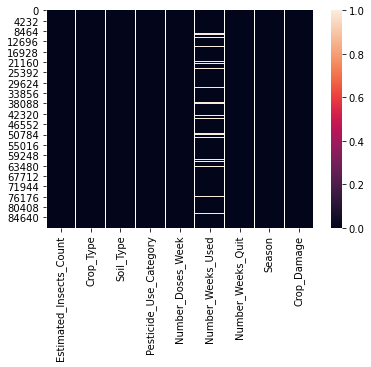

In [22]:
sns.heatmap(df.isnull())#From this we can understand that there are no missing values in the data set

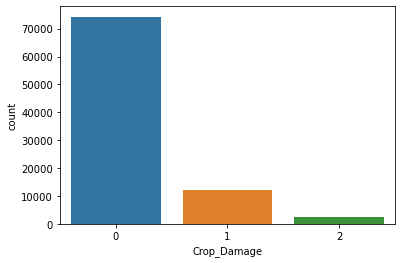

In [23]:
#Now lets visualize the crop damage status
sns.countplot(df['Crop_Damage'])

In [24]:
df['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [25]:
#From this we can understand that there are 74238 Crops which are alive, 12307 Crops have been detected with other damages and 2313 Crops have pesticide damage in our dataset

In [26]:
#Now lets find the correlation between different columns of the dataset
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.232192,-0.133117,-0.000184,1.000000


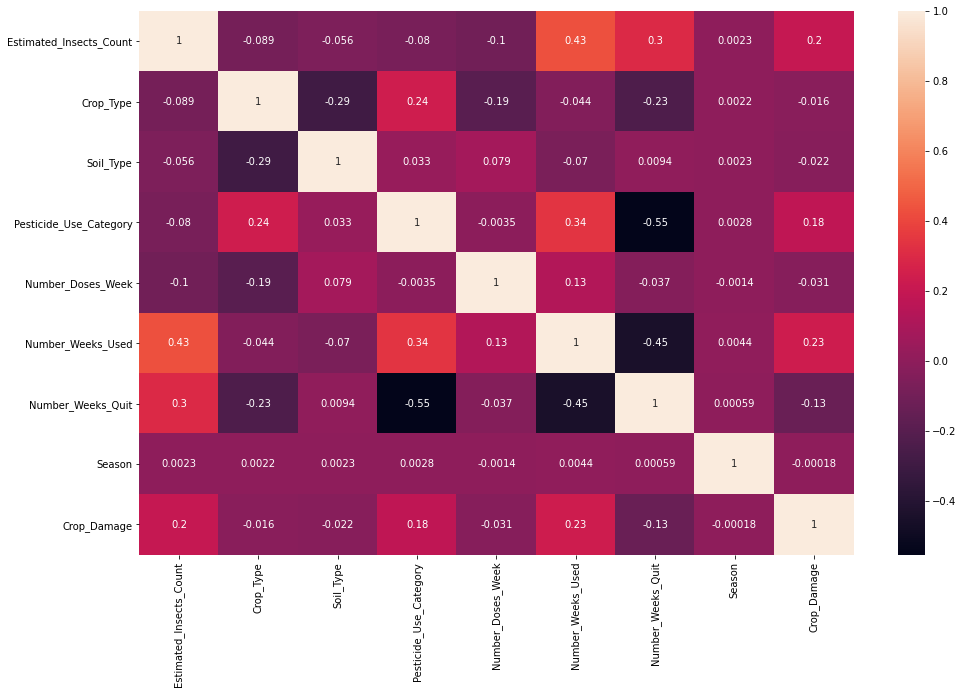

In [27]:
#Now lets plot the correlation using heatmap to understand the correlation using visualization
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Crop_Type                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Soil_Type                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Pesticide_Use_Category      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Number_Doses_Week             AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number_Weeks_Used          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number_Weeks_Quit          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Season                     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Crop_Damage                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

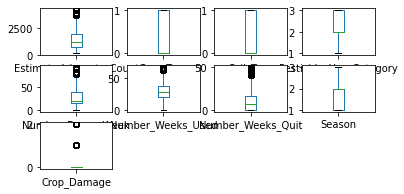

In [28]:
#Now lets check for outliers
df.plot(kind='box',subplots=True,layout=(4,4))

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imp=SimpleImputer(strategy="mean")
df['Number_Weeks_Used']=imp.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))

In [31]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


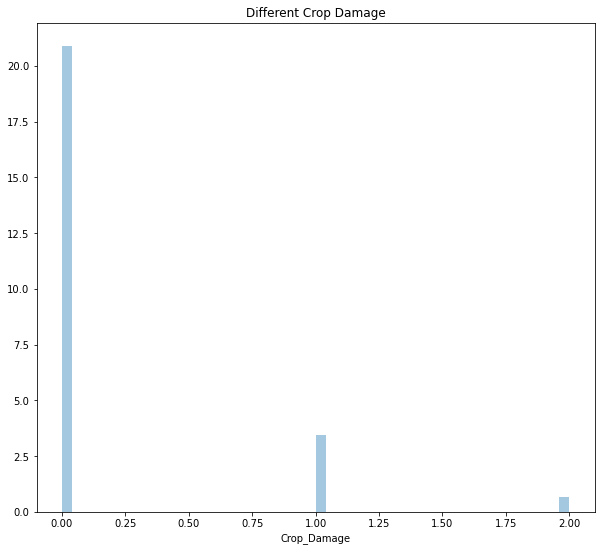

In [32]:
plt.figure(figsize=(10,9))
plt.title("Different Crop Damage")
sns.distplot(df['Crop_Damage'])

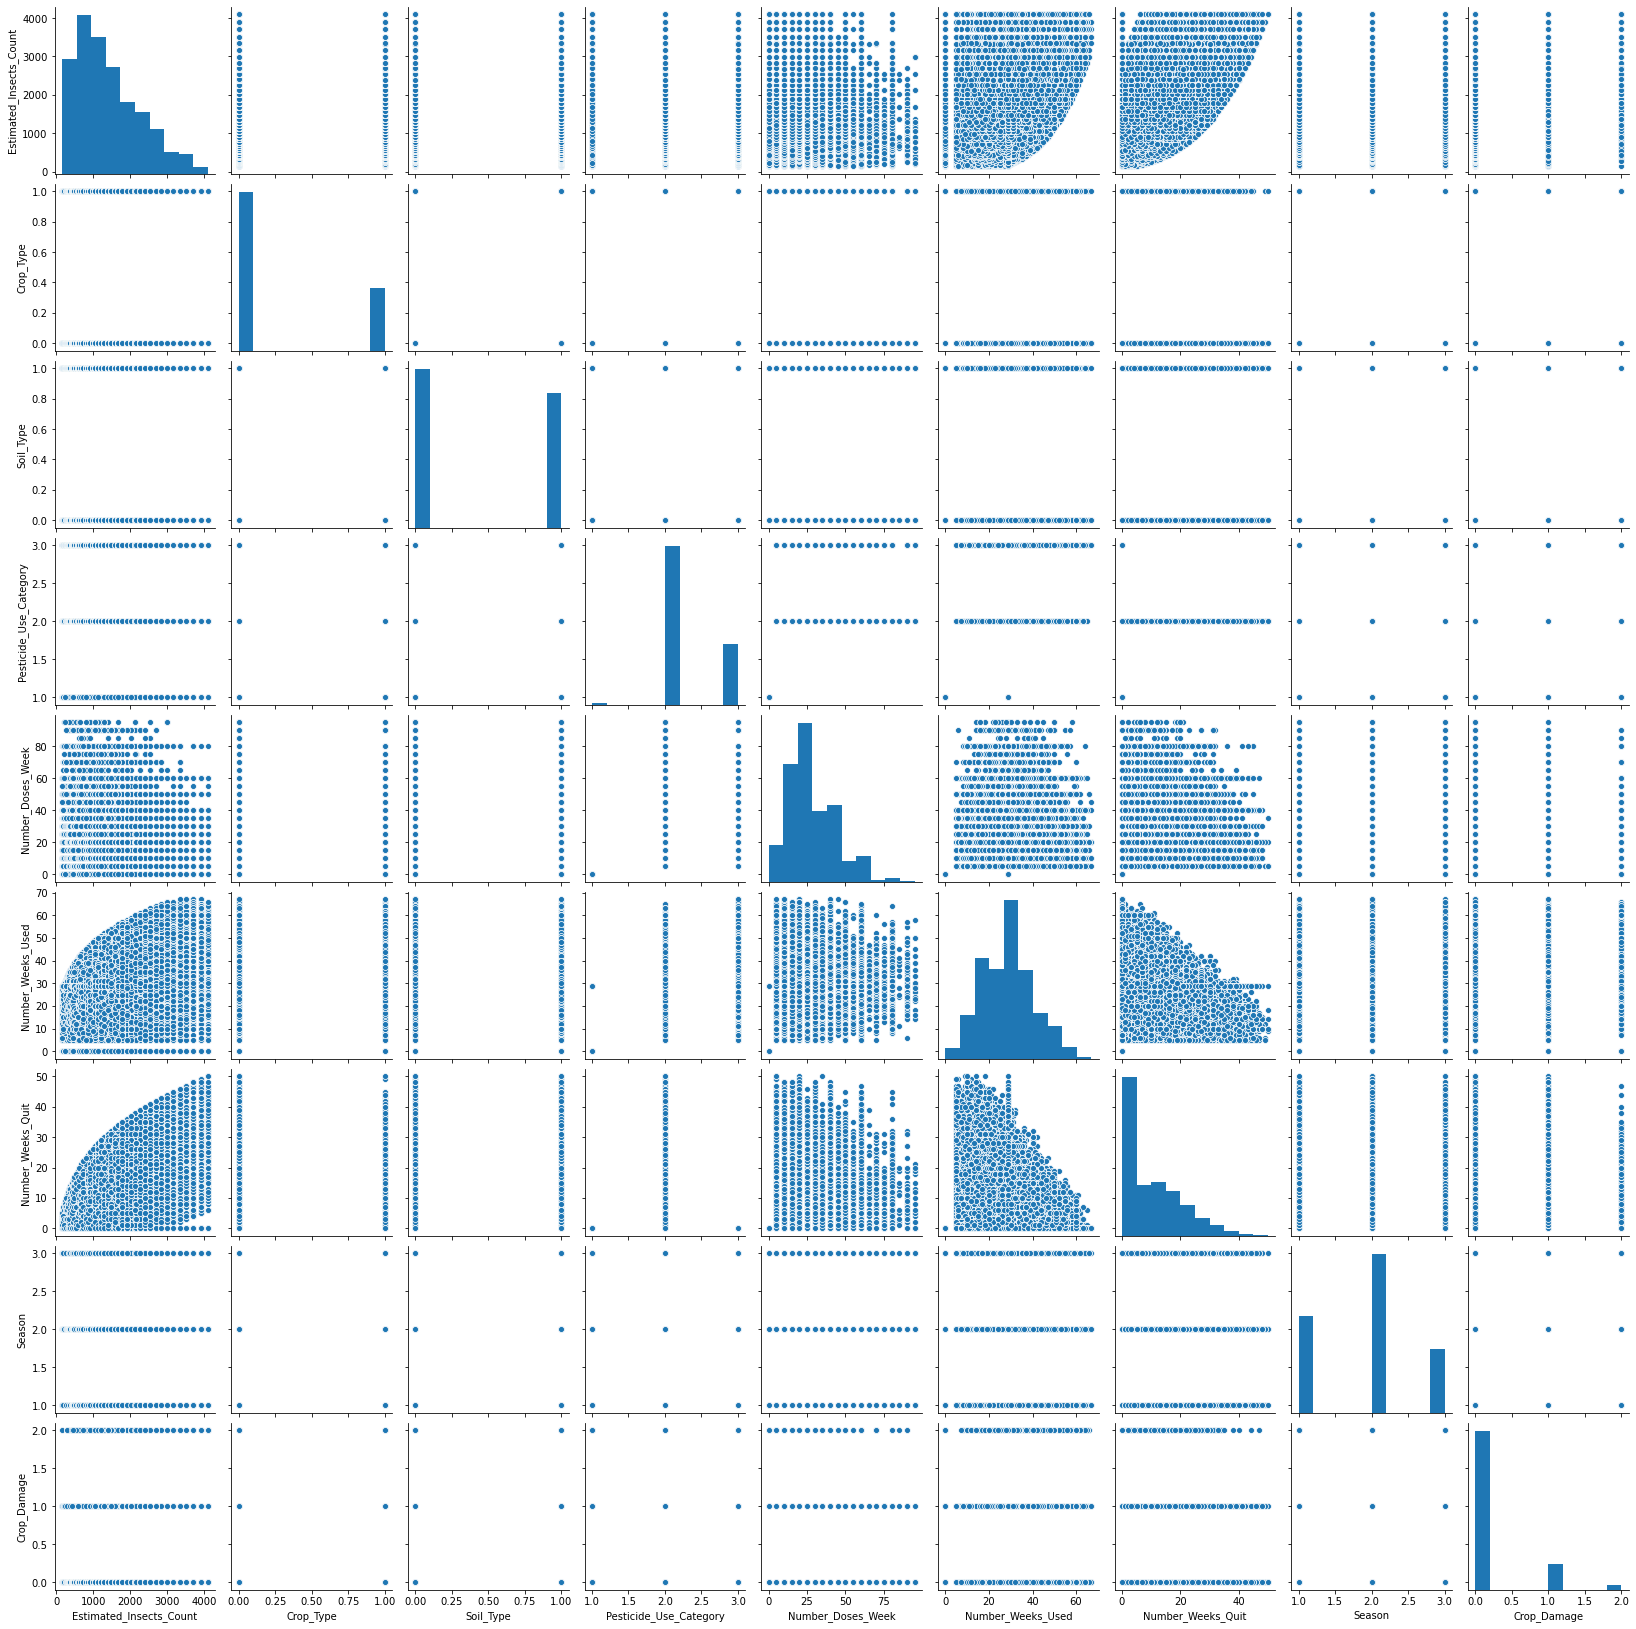

In [33]:
sns.pairplot(df)

In [34]:
#Lets check for skewness in the dataset
df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

In [35]:
#Now lets treat the outliers and remove the skewness in the data
import scipy.stats
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.42632444, 1.58634254, 0.92002085, ..., 0.96862918, 1.27896183,
        0.41954474],
       [1.40159074, 1.58634254, 0.92002085, ..., 0.96862918, 0.14692448,
        1.78206788],
       [1.34505657, 1.58634254, 0.92002085, ..., 0.96862918, 0.14692448,
        1.78206788],
       ...,
       [2.49337818, 1.58634254, 0.92002085, ..., 0.16059534, 0.14692448,
        0.41954474],
       [2.7124481 , 1.58634254, 0.92002085, ..., 0.84944697, 1.57281078,
        0.41954474],
       [2.93976258, 1.58634254, 0.92002085, ..., 0.26159957, 1.57281078,
        0.41954474]])

In [36]:
threshold=3
print(np.where(z>3))

(array([    7,     9,    14, ..., 88741, 88770, 88853], dtype=int64), array([8, 8, 8, ..., 8, 4, 6], dtype=int64))


In [37]:
#Now lets remove the outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88852,3165,1,0,2,60,44.0,15,2,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [38]:
df.shape

(88858, 9)

In [39]:
df_new.shape

(84853, 9)

In [40]:
y1=df_new.iloc[:,-1:]#setting output for new data after removing outliers
#we would be analyzing both the data ie after outlier removal and before removal
x1=df_new.drop(['Crop_Damage'],axis=1)

In [41]:
y1

,Crop_Damage
0,0
1,1
2,1
3,1
4,1
...,...
88852,0
88854,0
88855,0
88856,0


In [42]:
x1.shape

(84853, 8)

In [43]:
y1.shape

(84853, 1)

In [44]:
scale=StandardScaler()
x1=scale.fit_transform(x1)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=42)

In [46]:
x_train.shape

(56851, 8)

In [47]:
y_train.shape

(56851, 1)

In [48]:
x_test.shape

(28002, 8)

In [49]:
y_test.shape

(28002, 1)

In [50]:
from sklearn.model_selection import cross_val_score

In [ ]:
model=[GaussianNB(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\nAccuracy Score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\nCross validation score for',m,'is',cross_val_score(m,x1,y1,cv=5))

In [51]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy Score for Random Forest is')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

<ipython-input-51-975294eaf3c9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Accuracy Score for Random Forest is
0.85322476965931
[[23009  1042]
 [ 3068   883]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     24051
           1       0.46      0.22      0.30      3951

    accuracy                           0.85     28002
   macro avg       0.67      0.59      0.61     28002
weighted avg       0.82      0.85      0.83     28002



In [52]:
#From The above model scores we come to the conclusion that Random forest classifier has the highest accuracy now we would save our best model

In [53]:
filename='pickleagrifile.pkl'
pickle.dump(rf,open(filename,'wb'))

In [55]:
test_data=pd.read_excel('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/test_agriculture.xlsx')

In [56]:
test_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [58]:
test_data.drop(['ID'],axis=1,inplace=True)

In [59]:
test_data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


In [60]:
imp1=SimpleImputer(strategy="mean")
test_data['Number_Weeks_Used']=imp1.fit_transform(test_data['Number_Weeks_Used'].values.reshape(-1,1))

In [61]:
test_data.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [62]:
lm=pickle.load(open(filename,'rb'))

In [63]:
lm.predict(test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)